# 不同软件预测错义突变对EIF1AX的影响

这里选取了 <br/>
PolyPhen2 http://genetics.bwh.harvard.edu/pph2/ <br/>
Provean  http://provean.jcvi.org/index.php  <br/>
ParsSNP https://github.com/bose-lab/ParsSNP  <br/>
Open-cravat  <br/>
https://github.com/KarchinLab/open-cravat/wiki  <br/>
VEST4 <br/>
REVEL <br/>
CHASMplus  https://github.com/KarchinLab/CHASMplus <br/>
这4个软件对错意突变的预测，并通过分析结果，讨论了预测效果的相关性。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
poly=pd.read_csv('Poly.txt',sep="\t",skipfooter=5,engine='python')
poly[:5]

,#o_acc,o_pos,o_aa1,o_aa2,rsid,acc,pos,aa1,aa2,prediction,pph2_prob,pph2_FPR,pph2_TPR
0,P47813,137,D,Y,?,P47813,137,D,Y,benign,0.260,0.11800,0.91000
1,P47813,135,G,E,?,P47813,135,G,E,benign,0.050,0.16600,0.94100
2,P47813,127,D,A,?,P47813,127,D,A,possiblydamaging,0.884,0.06420,0.82300
3,P47813,122,G,D,?,P47813,122,G,D,possiblydamaging,0.844,0.06770,0.83500
4,P47813,122,G,V,?,P47813,122,G,V,probablydamaging,1.000,0.00026,0.00018


In [3]:
set(poly['prediction'])

{'benign', 'possiblydamaging', 'probablydamaging'}

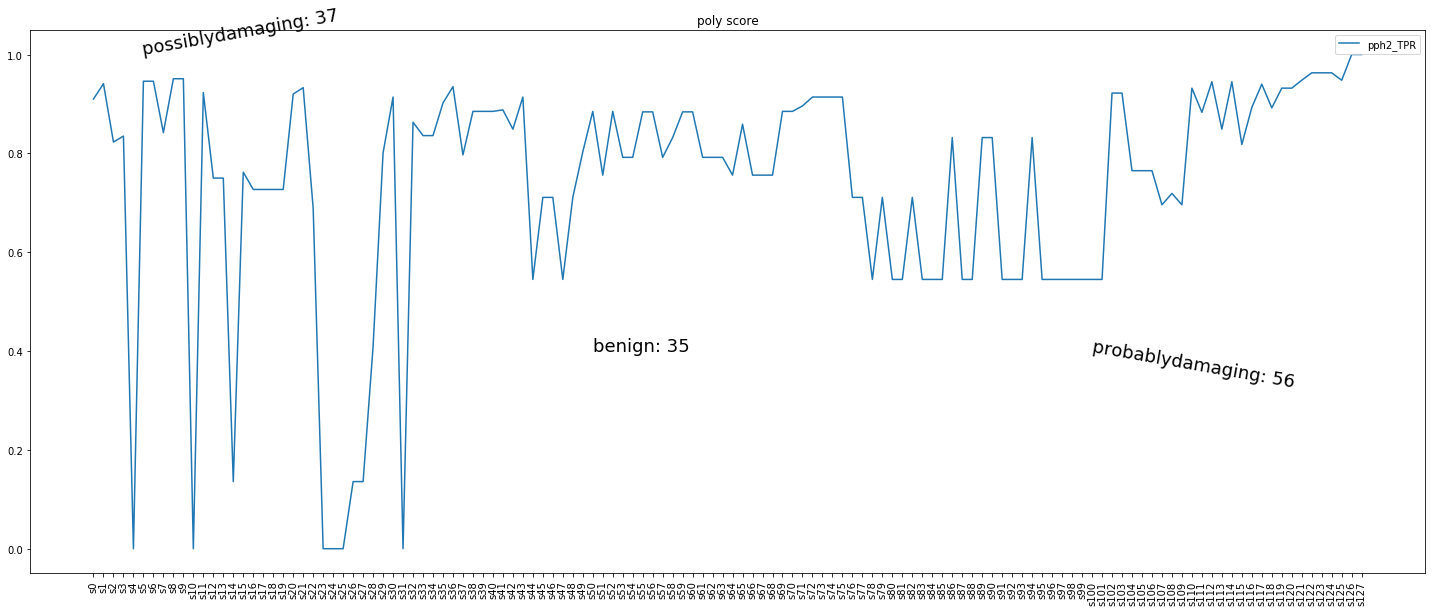

In [4]:
plt.figure(figsize=(25,10))
plt.plot(["s"+str(i) for i in range(poly.shape[0])],poly['pph2_TPR'],label='pph2_TPR')
plt.xticks(rotation=90)
plt.title('poly score')
plt.legend()
possiblydamaging='possiblydamaging: '+str(len([i for _,i in poly.iterrows() if i['prediction']=='possiblydamaging']))
probablydamaging='probablydamaging: '+str(len([i for _,i in poly.iterrows() if i['prediction']=='probablydamaging']))
benign='benign: '+str(len([i for _,i in poly.iterrows() if i['prediction']=='benign']))

plt.text(5, 1, possiblydamaging, ha='left',
         rotation=10, wrap=True,fontsize=18,)
plt.text(100, 0.4, probablydamaging, ha='left',
         rotation=-10, wrap=True,fontsize=18,)
plt.text(50, 0.4, benign, ha='left',
         rotation=0, wrap=True,fontsize=18,)
plt.savefig('png/poly.png')
plt.show()

In [5]:
parsesnp=pd.read_csv('ParsSNP.output.result.hg38_multianno.txt',sep='\t')
parsesnp[:5]#parsnp > 0.1;

,Chr,Start,End,Ref,Alt,Func.refGene,Gene.refGene,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,...,Truncation.Rate,Cancer.Type.Distribution,VarClassS,VarClassT,b62,Norm_Position,Old_AA,New_AA,Peptide_Position,ParsSNP
0,X,20130536,20130536,G,T,exonic,EIF1AX,NaN,nonsynonymous SNV,D137N,...,0.003753,0.0045,0,0,1,0.951389,D,N,137,0.052437
1,X,20130541,20130541,G,A,exonic,EIF1AX,NaN,nonsynonymous SNV,G135V,...,0.003753,0.0045,0,0,-3,0.937500,G,V,135,0.045785
2,X,20130565,20130565,A,C,exonic,EIF1AX,NaN,nonsynonymous SNV,D127G,...,0.003753,0.0045,0,0,-1,0.881944,D,G,127,0.052339
3,X,20130580,20130580,G,A,exonic,EIF1AX,NaN,nonsynonymous SNV,G122V,...,0.003753,0.0045,0,0,-3,0.847222,G,V,122,0.054029
4,X,20130580,20130580,G,T,exonic,EIF1AX,NaN,nonsynonymous SNV,G122D,...,0.003753,0.0045,0,0,-1,0.847222,G,D,122,0.053622


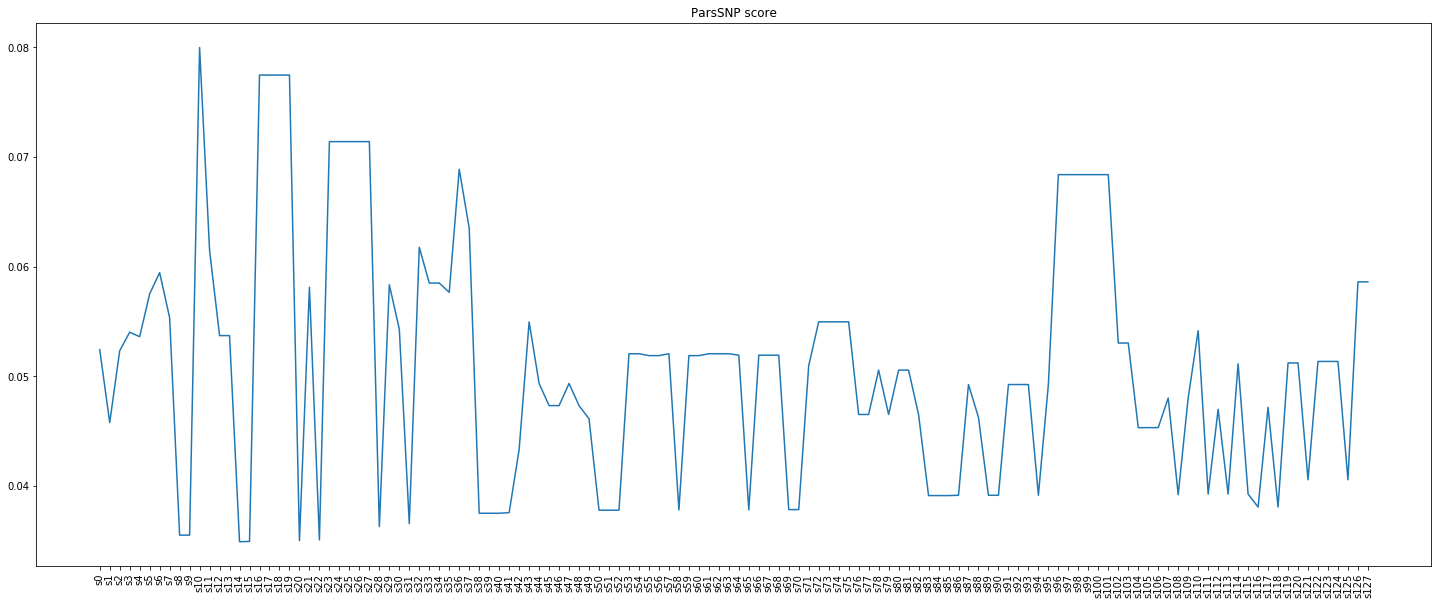

In [6]:
plt.figure(figsize=(25,10))
plt.plot(["s"+str(i) for i in range(parsesnp.shape[0])],parsesnp['ParsSNP'])
plt.xticks(rotation=90)
plt.title('ParsSNP score')
plt.savefig('png/ParsSNP_score.png')
plt.show()

In [7]:
provean=pd.read_csv('PROVEAN.tsv',sep="\t")
provean[:5]#provean <= -2.5

,#ROW_NO.,INPUT,PROTEIN_ID,POSITION,RESIDUE_REF,RESIDUE_ALT,SCORE,PREDICTION (cutoff=-2.5),#SEQ,#CLUSTER,SCORE.1,PREDICTION (cutoff=0.05),MEDIAN_INFO,#SEQ.1
0,1,"P47813,137,D,Y",P47813,137,D,Y,-3.31,Deleterious,328,30,0.001,Damaging,3.47,148
1,2,"P47813,135,G,E",P47813,135,G,E,0.30,Neutral,328,30,0.584,Tolerated,3.38,145
2,3,"P47813,127,D,A",P47813,127,D,A,-3.24,Deleterious,328,30,0.096,Tolerated,3.03,284
3,4,"P47813,122,G,D",P47813,122,G,D,-2.34,Neutral,328,30,0.129,Tolerated,3.00,277
4,5,"P47813,122,G,V",P47813,122,G,V,-4.63,Deleterious,328,30,0.059,Tolerated,3.00,277


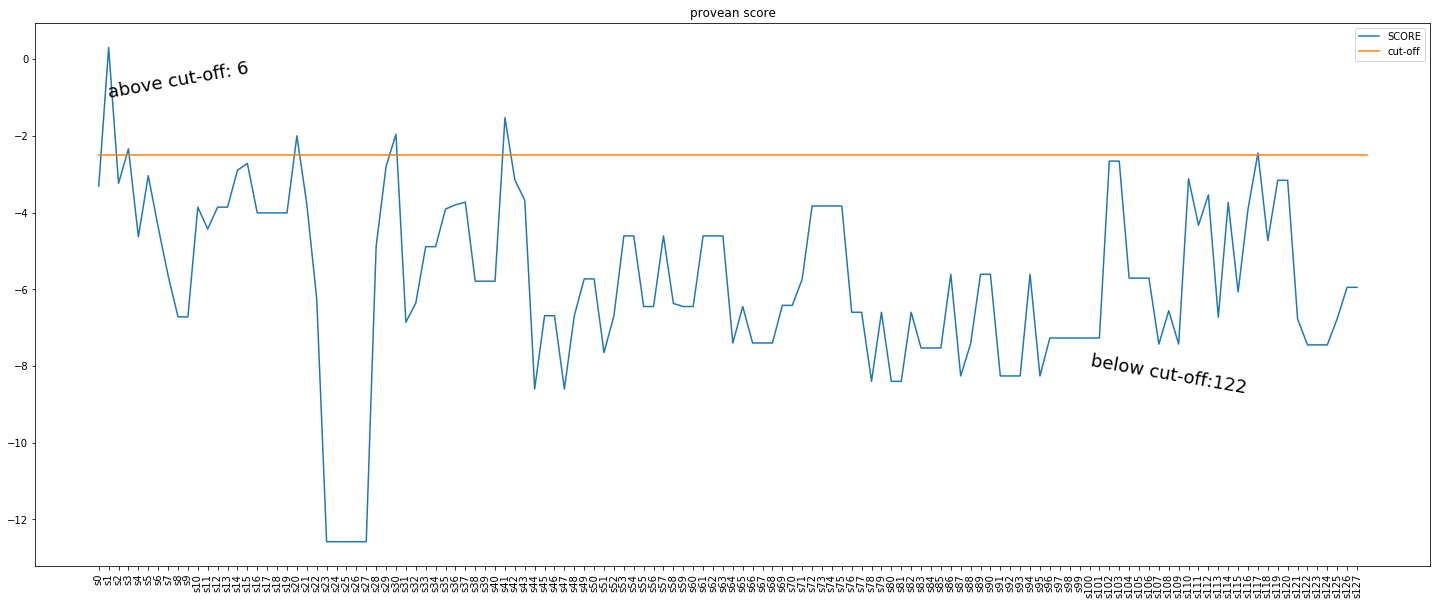

In [8]:
plt.figure(figsize=(25,10))
plt.plot(["s"+str(i) for i in range(provean.shape[0])],provean['SCORE'],label='SCORE')
plt.plot([0,provean.shape[0]],[-2.5,-2.5],label='cut-off')
plt.xticks(rotation=90)
plt.title('provean score')
plt.legend()
plt.text(1, -1, 'above cut-off: '+str(len([i for i in provean['SCORE'] if i> -2.5 ])), ha='left',
         rotation=10, wrap=True,fontsize=18,)
plt.text(100, -8,  'below cut-off:'+str(len([i for i in provean['SCORE'] if i<= -2.5 ])), ha='left',
         rotation=-10, wrap=True,fontsize=18,)
plt.savefig('png/provean.png')
plt.show()

In [9]:
len(provean.loc[provean['SCORE']<=-2.5,:].index)

122

In [10]:
neg=pd.read_csv('open.tsv',sep="\t",skipfooter=275,skiprows=5,engine='python')

In [11]:
a=pd.DataFrame()
neg['Samples']=neg['Samples'].apply(lambda x:x.split(';'))
for _,s in neg.iterrows():
    for t in s['Samples']:
        change=s.copy()
        change['Samples']=t
        a=pd.concat([a,change],axis=1,sort=True,ignore_index=True)
neg=a.T
neg['Samples']=neg['Samples'].apply(lambda x:int(x.replace('s','')))
neg=neg.sort_values(by='Samples')
neg['Samples']="s"+neg['Samples'].astype('str')

In [12]:
neg.columns

Index(['All Mappings', 'All results', 'All transcripts', 'Alt Base', 'Chrom',
       'Coding', 'HUGO', 'Hugo', 'Note', 'P-value', 'P-value.1', 'Position',
       'Protein Change', 'Ref Base', 'Sample Count', 'Samples', 'Score',
       'Score Transcript', 'Score.1', 'Score.2', 'Sequence Ontology', 'Tags',
       'Transcript', 'Transcript.1', 'UID'],
      dtype='object')

In [13]:
len(neg.loc[neg['Score']>=0.27,:].index)

128

In [14]:
len(neg.loc[neg['Score.1']>= 0.4,:].index),len(neg.loc[neg['Score.2']>= 0.5,:].index)

(52, 102)

In [15]:
parsesnp=pd.read_csv('ParsSNP.output.result.hg38_multianno.txt',sep='\t')
parsesnp[:5]#parsnp > 0.1;

,Chr,Start,End,Ref,Alt,Func.refGene,Gene.refGene,GeneDetail.refGene,ExonicFunc.refGene,AAChange.refGene,...,Truncation.Rate,Cancer.Type.Distribution,VarClassS,VarClassT,b62,Norm_Position,Old_AA,New_AA,Peptide_Position,ParsSNP
0,X,20130536,20130536,G,T,exonic,EIF1AX,NaN,nonsynonymous SNV,D137N,...,0.003753,0.0045,0,0,1,0.951389,D,N,137,0.052437
1,X,20130541,20130541,G,A,exonic,EIF1AX,NaN,nonsynonymous SNV,G135V,...,0.003753,0.0045,0,0,-3,0.937500,G,V,135,0.045785
2,X,20130565,20130565,A,C,exonic,EIF1AX,NaN,nonsynonymous SNV,D127G,...,0.003753,0.0045,0,0,-1,0.881944,D,G,127,0.052339
3,X,20130580,20130580,G,A,exonic,EIF1AX,NaN,nonsynonymous SNV,G122V,...,0.003753,0.0045,0,0,-3,0.847222,G,V,122,0.054029
4,X,20130580,20130580,G,T,exonic,EIF1AX,NaN,nonsynonymous SNV,G122D,...,0.003753,0.0045,0,0,-1,0.847222,G,D,122,0.053622


In [16]:
for s in ['ParsSNP',]:#'ParsSNP'
    parsesnp[s]=parsesnp[s].fillna(0)   

In [17]:
for s in ['SIFT_score','VEST3_score','Polyphen2_HDIV_score','Polyphen2_HVAR_score','FATHMM_score']:
    #print(type(parsesnp[s][1]))
    parsesnp[s]=parsesnp[s].str.strip()
    parsesnp[s]=parsesnp[s].replace('.','0')
    parsesnp[s]=parsesnp[s].astype('float').fillna(0)  

In [18]:
import numpy as np

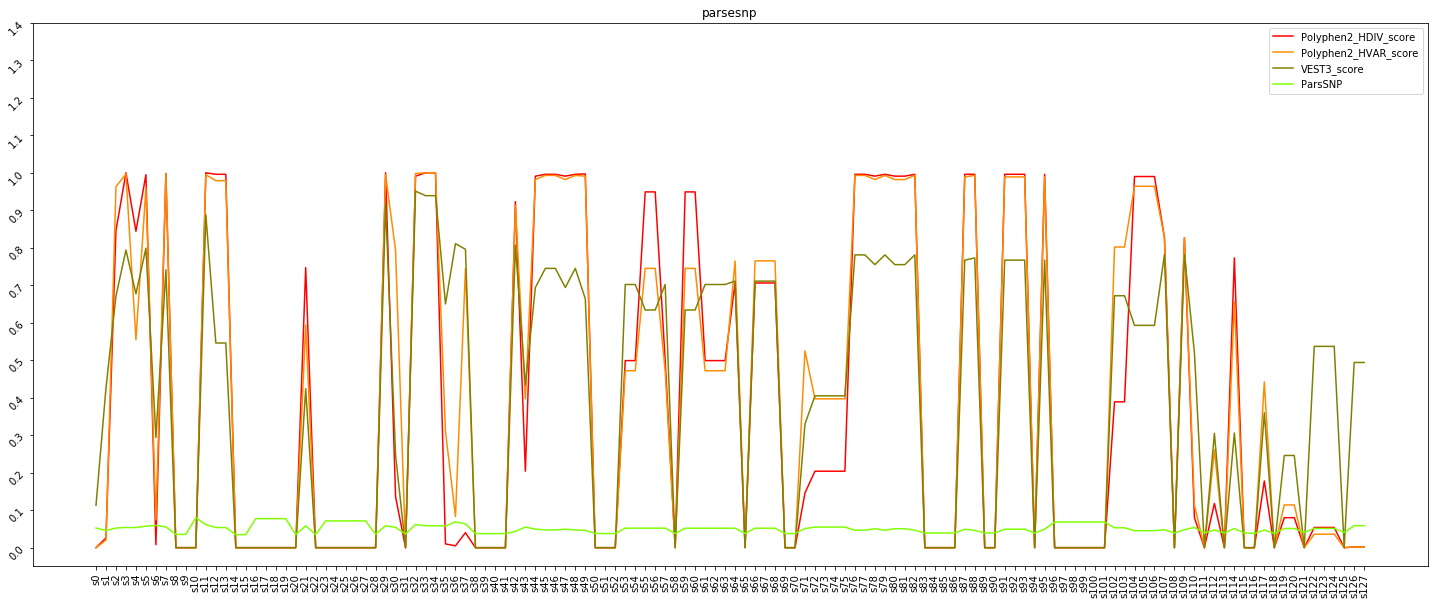

In [19]:
#parsesnp
plt.figure(figsize=(25,10))
co=['#000000','#FF0000','#FF8C00','#FFD700','#808000','#7FFF00',]
#plt.plot(['s'+str(i) for i in range(parsesnp.shape[0])],parsesnp['SIFT_score'],co[0],label='SIFT_score')
plt.plot(['s'+str(i) for i in range(parsesnp.shape[0])],parsesnp['Polyphen2_HDIV_score'],co[1],label='Polyphen2_HDIV_score')
plt.plot(['s'+str(i) for i in range(parsesnp.shape[0])],parsesnp['Polyphen2_HVAR_score'],co[2],label='Polyphen2_HVAR_score')
#plt.plot(['s'+str(i) for i in range(parsesnp.shape[0])],parsesnp['FATHMM_score'],c=co[3],label='FATHMM_score')
plt.plot(['s'+str(i) for i in range(parsesnp.shape[0])],parsesnp['VEST3_score'],c=co[4],label='VEST3_score')
plt.plot(['s'+str(i) for i in range(parsesnp.shape[0])],parsesnp['ParsSNP'],c=co[5],label='ParsSNP')
plt.xticks(rotation=90)
plt.yticks([i for i in np.arange(0, 1.5, 0.1)],rotation=45)
plt.legend()
plt.title('parsesnp')
plt.savefig('png/parsesnp.jpg')
plt.show()

pph2 >= 0.5; provean <= -2.5; vest >= 0.5; revel >= 0.4; parsnp > 0.1;  <br/> chasmplus >= 0.27; as damaging mutations

In [20]:
from matplotlib_venn import venn3

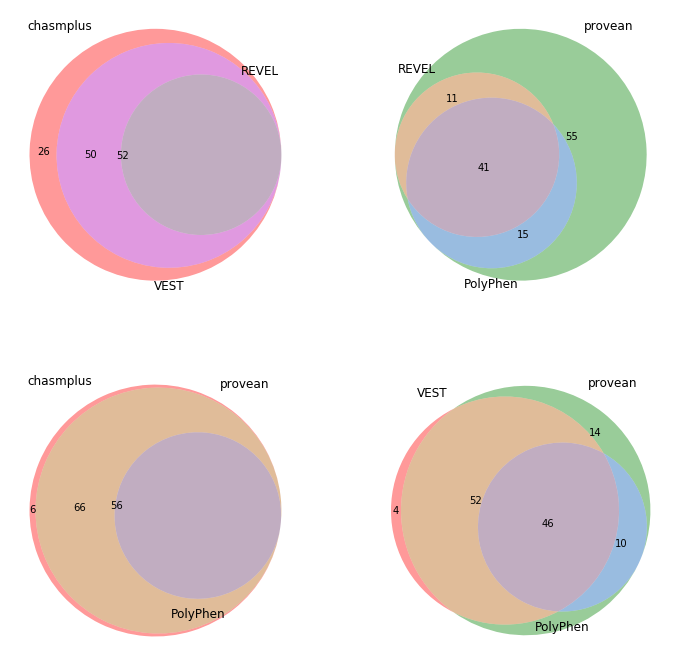

In [21]:
figure, axes = plt.subplots(2, 2,figsize=(12, 12))
venn3(
    [
        set(neg.loc[neg['Score']>= 0.27,:].index), 
        set(neg.loc[neg['Score.1']>= 0.4,:].index), 
        set(neg.loc[neg['Score.2']>= 0.5,:].index),
      ],
      ('chasmplus','REVEL', 'VEST',),
      ax=axes[0,0]
)
venn3(
    [
        set(neg.loc[neg['Score']>= 0.27,:].index), 
        set(provean.loc[provean['SCORE']<=-2.5,:].index),
        set(poly.loc[poly['prediction']=='probablydamaging',:].index),
      ],
      ('chasmplus','provean','PolyPhen'),
      ax=axes[1,0]
)
venn3(
    [
        set(neg.loc[neg['Score.1']>= 0.4,:].index), 
        set(provean.loc[provean['SCORE']<=-2.5,:].index),
        set(poly.loc[poly['prediction']=='probablydamaging',:].index),
      ],
      ('REVEL','provean','PolyPhen'),
      ax=axes[0,1]
)
venn3(
    [
        set(neg.loc[neg['Score.2']>= 0.5,:].index),
        set(provean.loc[provean['SCORE']<=-2.5,:].index),
        set(poly.loc[poly['prediction']=='probablydamaging',:].index),
      ],
      ('VEST','provean','PolyPhen'),
      ax=axes[1,1]
)
plt.savefig('png/venn.jpg')
plt.show()

In [22]:
score=pd.DataFrame()
#poly['pph2_TPR'],neg['Score'],neg['Score.1'],neg['Score.2'],provean['SCORE']
score.loc[:,'PolyPhen'],score.loc[:,'chasmplus'],score.loc[:,'REVEL'],score.loc[:,'VEST'],\
score.loc[:,'provean'],=poly['pph2_TPR'],neg['Score'],neg['Score.1'],neg['Score.2'],\
provean['SCORE']

In [23]:
score[:5]

,PolyPhen,chasmplus,REVEL,VEST,provean
0,0.91000,0.334,0.201,0.648,-3.31
1,0.94100,0.286,0.104,0.386,0.30
2,0.82300,0.388,0.291,0.713,-3.24
3,0.83500,0.341,0.199,0.714,-2.34
4,0.00018,0.371,0.383,0.71,-4.63


In [24]:
for v in score:
    score[v]=score[v].apply(lambda x:(x-np.min(score[v]))/(np.max(score[v])-np.min(score[v])))

In [25]:
score1=score.copy()

In [26]:
score[:10]

,PolyPhen,chasmplus,REVEL,VEST,provean
0,0.909984,0.145897,0.196353,0.584733,0.719720
1,0.940989,0.000000,0.060309,0.184733,1.000000
2,0.822968,0.310030,0.322581,0.683969,0.725155
3,0.834970,0.167173,0.193548,0.685496,0.795031
4,0.000000,0.258359,0.451613,0.679389,0.617236
5,0.945990,0.209726,0.124825,0.648855,0.740683
6,0.945990,0.325228,0.241234,0.665649,0.636646
7,0.841972,0.158055,0.402525,0.705344,0.538820
8,0.950991,0.392097,0.360449,0.984733,0.454969
9,0.950991,0.392097,0.360449,0.984733,0.454969


In [27]:
import seaborn as snb

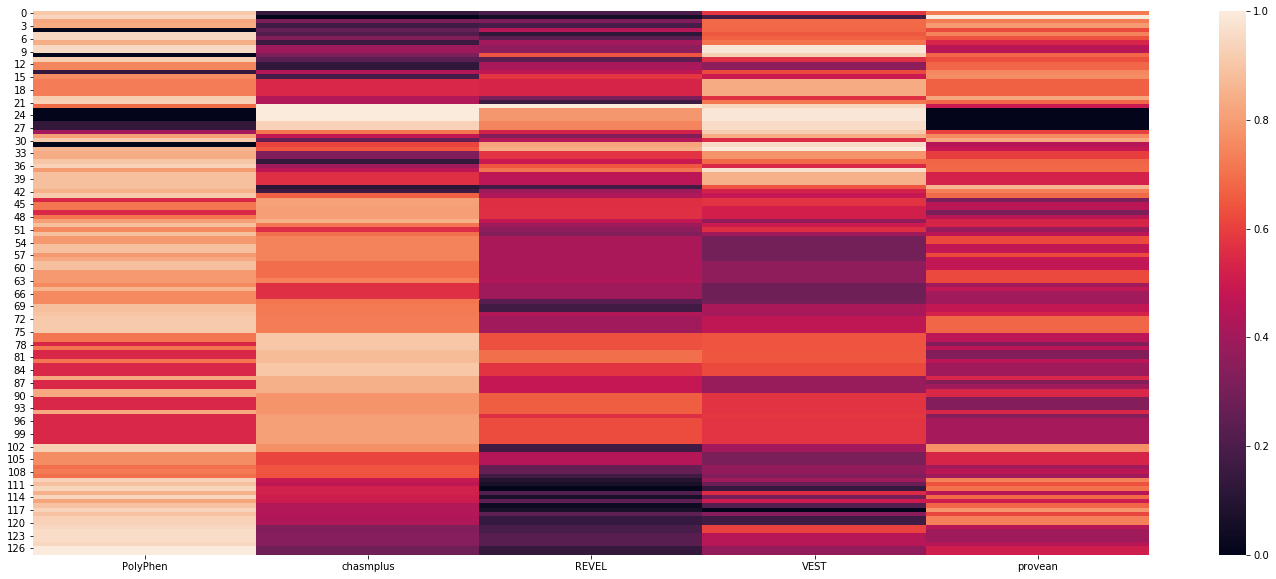

In [28]:
plt.figure(figsize=(25,10))
snb.heatmap(score)
plt.savefig('png/heatmap_only_normalization.jpg')
plt.show()

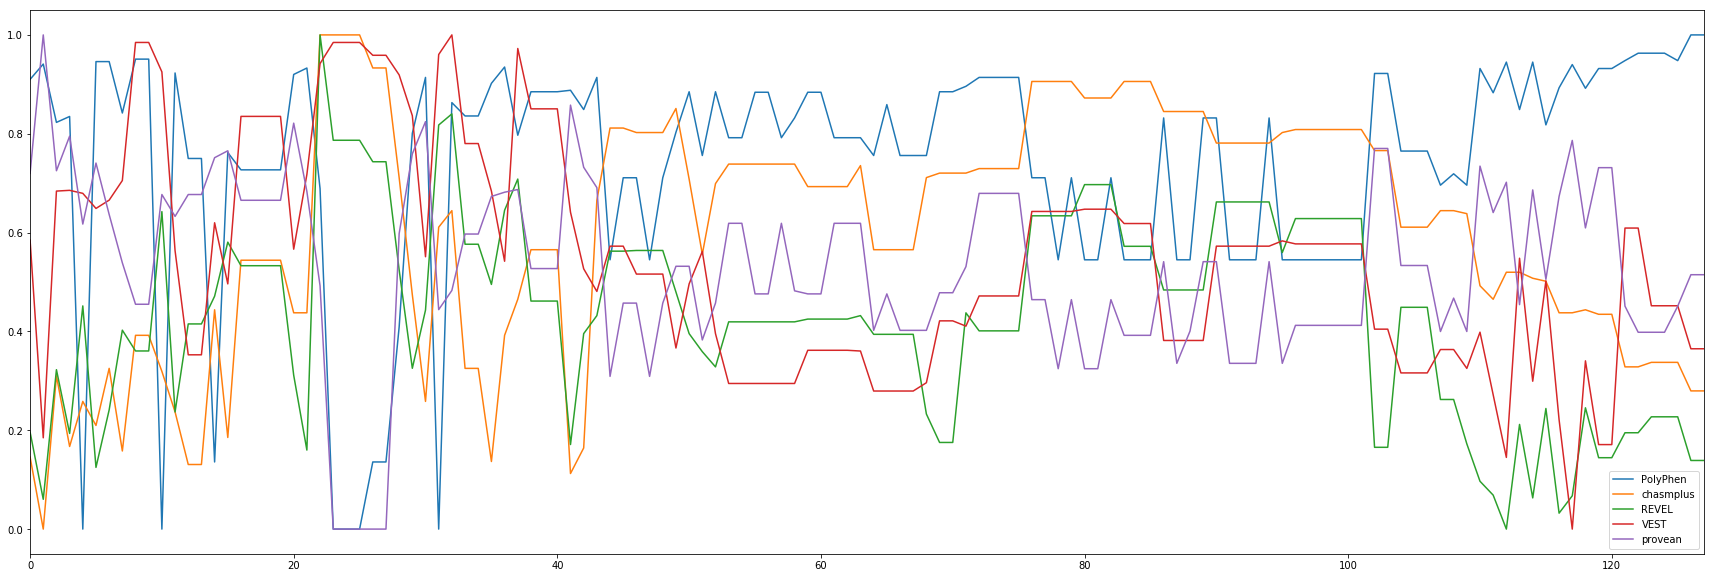

In [29]:
figure, axes = plt.subplots(1, 1,figsize=(30, 10))
score.plot(ax=axes)
figure.savefig('png/plot_only_normalization.jpg')
plt.show()

In [30]:
score1.loc[neg.loc[neg['Score']>= 0.27,:].index,'chasmplus']=1
score1.loc[neg.loc[neg['Score.1']>= 0.4,:].index,'REVEL']=1
score1.loc[neg.loc[neg['Score.2']>= 0.5,:].index,'VEST']=1
score1.loc[provean.loc[provean['SCORE']<=-2.5,:].index,'provean']=1
score1.loc[poly.loc[poly['prediction']=='probablydamaging',:].index,'PolyPhen']=1

In [31]:
score1=score1.fillna(1)

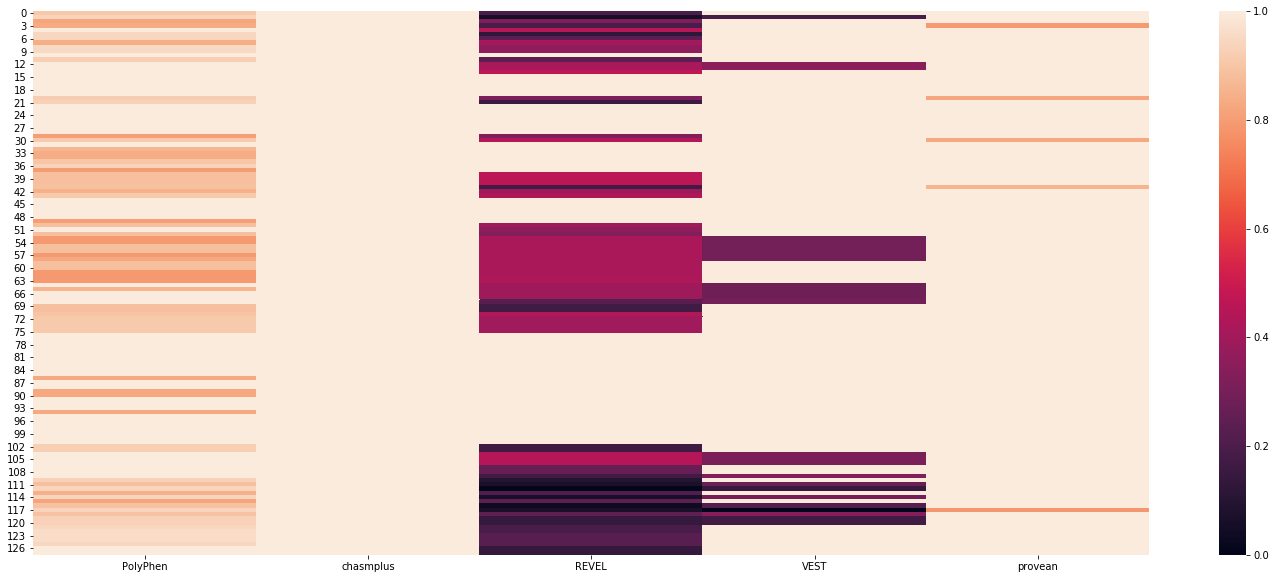

In [32]:
plt.figure(figsize=(25,10))
snb.heatmap(score1)
plt.savefig('png/heatmap_fill_damages_with_0.jpg')
plt.show()